## Notebook content

### Multipe variable linear regression model

        
### Features scaling


In [116]:
import numpy as np
import matplotlib.pyplot as plt
import copy, math
import pandas as pd
from tabulate import tabulate

In [26]:
houses_data = pd.read_csv("house.csv")
houses_data.head(3)

,size(sqft),bedrooms,floors,age,price(1000$)
0,1240.0,3.0,1.0,64.0,300.0
1,1950.0,3.0,2.0,17.0,510.0
2,1730.0,3.0,2.0,42.0,394.0


have 4 features ( house size , number of bedrooms, number of floors, house age) <br>
so f_wb(prediction value) = w1x1+ w2x2 + w3x3 + w4x4 + b

In [27]:
x_train = np.array (houses_data.loc[:, 'size(sqft)':'age'])
y_train = np.array(houses_data['price(1000$)'])
x_features = ['size(sqft)','bedrooms','floors','age']

In [ ]:
x_train

Text(0, 0.5, 'price(1000$')

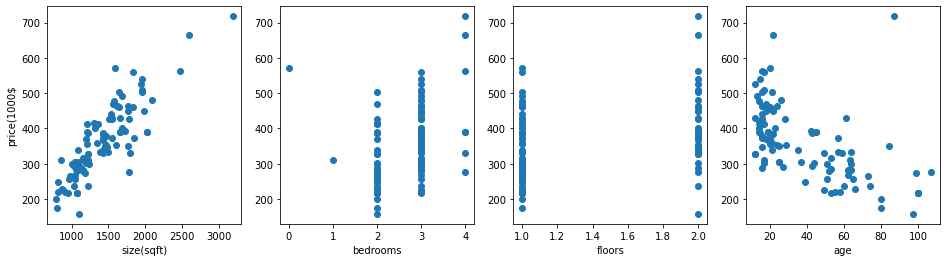

In [28]:
fig, ax = plt.subplots(1, 4, figsize=(16,4))
for i in range(len(ax)):
    ax[i].scatter(x_train[:,i], y_train)
    ax[i].set_xlabel(x_features[i])
ax[0].set_ylabel("price(1000$")

In [29]:
m,n = x_train.shape
m, n, y_train.shape

(99, 4, (99,))

In [30]:
b_init = 785.1811367994083
w_init = np.array([ 0.39133535, 18.75376741, -53.36032453, -26.42131618])

# Cost function

j(w,b) = (1/2m) * sum( f_wb - y )**2

In [31]:
# f_wb = row vector w * row vector x + b

def cost_function(x, y, w, b):
    errs = 0             
    for i in range(m):
        f_wb = np.dot(x[i],w) + b
        err = (f_wb - y[i])**2
        errs += err 
    
    return errs / (2 * m)


In [117]:
cost = cost_function(x_train, y_train, w_init, b_init)
cost2 = cost_function(x_train, y_train, final_w, final_b)
cost3 = cost_function(x_norm, y_train, norm_w, norm_b)

print(f"befor optimization => {cost:.2f} \naftet optimization =>  {cost2:.2f} \nafter features scaling => {cost3:.2f}")

befor optimization => 222304.68 
aftet optimization =>  1429.15 
after features scaling => 216.03


# Compute gradient 

#### dj_dw = 1/m sum (f_wb[i] - y[i]) * x[i,j]

#### dj_db = 1/m sum (f_wb[i] - y[i])

In [32]:
def compute_gradient(x, y, w, b):
    dj_dw = np.zeros(n)
    dj_db = 0
    for i in range(m):
        err = (np.dot(x[i],w) + b) - y[i]
        
        for j in range(n):
            dj_dw[j] += err * x[i,j]
        
        dj_db += err
        
    dj_dw = dj_dw / m
    dj_db = dj_db / m
    
    return dj_db , dj_dw

In [33]:
avg_dj_db , avg_dj_dw = compute_gradient(x_train, y_train, w_init, b_init) 
avg_dj_db, avg_dj_dw

(-59.8995498215009,
 array([ 1.45548780e+04, -1.01487828e+02,  1.57327825e+00, -1.92945421e+04]))

# Gradient Descent With Multiple Variables¶

#### w = w - alpha * dj_dw 
#### b = b -  alpha * dj _db



In [87]:
def gradient_descent(x, y, alpha, iteration_num, initil_w, initil_b, compute_gradient):
    
    w = copy.deepcopy(initil_w) 
    b = initil_b 
    j_history= []
    data = []

    for i in range(iteration_num):
        dj_db, dj_dw = compute_gradient(x, y, w, b)
        
        w = w - alpha * dj_dw
        b = b - alpha * dj_db
         # View test points
        j_history.append(cost_function(x, y, w, b))

        if i % 100 == 0:
             ## Initialize the data
            row = [i, j_history[i], dj_dw[0], dj_dw[1], dj_dw[2], dj_dw[3], w[0], w[1], w[2], w[3], b]
            data.append(row)

    # Define the table headers
    headers = ["I", "Cost", "dj_dw_0", "dj_dw_1", "dj_dw_2", "dj_dw_3", "w0","w1","w2","w3", "b"]

    # Print the table
    print(tabulate(data, headers=headers,colalign='right'))
    return w , b

In [88]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 5.0e-7

final_w , final_b = gradient_descent(x_train, y_train, alpha,iterations, initial_w, initial_b, compute_gradient)

  I     Cost    dj_dw_0    dj_dw_1    dj_dw_2     dj_dw_3        w0            w1            w2           w3            b
---  -------  ---------  ---------  ---------  ----------  --------  ------------  ------------  -----------  -----------
0    2158.92  -551813    -1005.97   -518.495   -12402.7    0.275906   0.000502985   0.000259247   0.00620137  0.000181576
100  1555.17  -15.2065   6.38686    8.29828       641.104  0.253593   0.000134278  -0.000178803  -0.0271372   0.000386238
200  1535.53  -14.5273   6.11504    8.25588       612.464  0.254336  -0.00017815   -0.000592638  -0.0584638   0.000613573
300  1517.6   -13.8785   5.85535    8.21537       585.104  0.255046  -0.000477296  -0.0010044    -0.088391    0.000848222
400  1501.24  -13.2586   5.60727    8.17667       558.966  0.255724  -0.000763752  -0.00141419   -0.116981    0.00108986
500  1486.3   -12.6664   5.37027    8.1397        533.996  0.256372  -0.00103809   -0.00182208   -0.144294    0.00133817
600  1472.67  -12.1007   5

## note 
##### w0 updated more faster than all w1-3 as it mul by size which it is a large value which shown importance of features scaling
dj_dw = 1/m sum (f_wb[i] - y[i]) * x[i,j]
 - not write dj_db as shape will not be nice 
 

In [39]:
final_w , final_b

(array([ 0.25919731, -0.00224389, -0.00383201, -0.26339942]),
 0.002667074866498598)

In [ ]:
f_wb = np.zeros(m)
for i in range(m):
    f_wb[i] = np.dot(x_train[i], final_w) + final_b
    print(f"prediction: {np.dot(x_train[i], final_w) + final_b:.2f} actual value is {y_train[i]}" )
    


# Features scaling
### z-score normalization 
After z-score normalization, all features will have a mean of 0 and a standard deviation of 1.

To implement z-score normalization, adjust your input values as shown in this formula:
$$x^{(i)}_j = \dfrac{x^{(i)}_j - \mu_j}{\sigma_j} \tag{4}$$ 
where $j$ selects a feature or a column in the $\mathbf{X}$ matrix. $µ_j$ is the mean of all the values for feature (j) and $\sigma_j$ is the standard deviation of feature (j).
$$
\begin{align}
\mu_j &= \frac{1}{m} \sum_{i=0}^{m-1} x^{(i)}_j \tag{5}\\
\sigma^2_j &= \frac{1}{m} \sum_{i=0}^{m-1} (x^{(i)}_j - \mu_j)^2  \tag{6}
\end{align}
$$

>**Implementation Note:** When normalizing the features, it is important
to store the values used for normalization - the mean value and the standard deviation used for the computations. After learning the parameters
from the model, we often want to predict the prices of houses we have not
seen before. Given a new x value (living room area and number of bed-
rooms), we must first normalize x using the mean and standard deviation
that we had previously computed from the training set.

**Implementation**

In [6]:
def zscore_normalization(X):# x any n dimensions array
    mu = np.mean(X, axis=0) # axis = 0 to make operation on columns
    # mu shape will be an array of means of all features[mu1, mu2 .....]
    sigma = np.std(X, axis=0)
    
    X_norm = (X - mu)/ sigma
    
    return X_norm, mu, sigma
    

In [7]:
x_norm, mean, sigma = zscore_normalization(x_train)

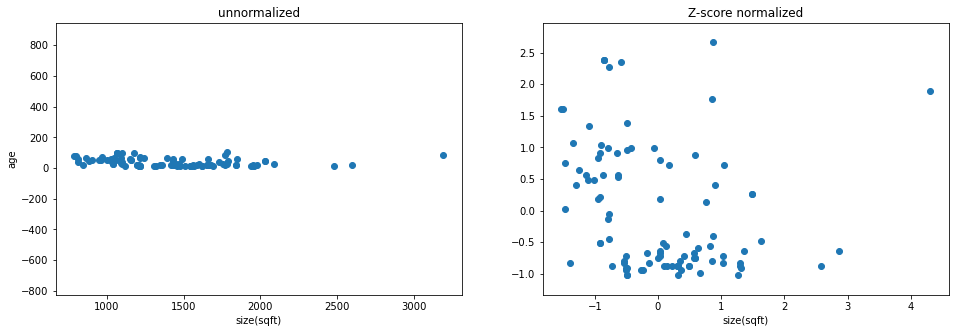

In [16]:
fig, ax = plt.subplots(1, 2, figsize= (16,5))
ax[0].scatter(x_train[:, 0], x_train[:, 3])
ax[0].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[0].set_title("unnormalized")
ax[0].axis('equal')

ax[1].scatter(x_norm[:, 0], x_norm[:, 3])
ax[1].set_xlabel(x_features[0]); ax[0].set_ylabel(x_features[3])
ax[1].set_title("Z-score normalized")
ax[1].axis('equal')

plt.show()

Let's re-run our gradient descent algorithm with normalized data. Note the vastly larger value of alpha. This will speed up gradient descent.

In [99]:
initial_w = np.zeros_like(w_init)
initial_b = 0.
iterations = 1000
alpha = 7.0e-2

norm_w , norm_b = gradient_descent(x_norm, y_train, alpha,iterations, initial_w, initial_b, compute_gradient)

  I     Cost       dj_dw_0      dj_dw_1      dj_dw_2       dj_dw_3         w0         w1        w2         w3         b
---  -------  ------------  -----------  -----------  ------------  ---------  ---------  --------  ---------  --------
0    61575.4  -89.152       -29.4873     -32.8014     59.6019         6.24064    2.06411    2.2961   -4.17214   25.4206
100  231.382  -2.58034      1.22322      1.54879      -0.435525     103.147    -17.744    -28.3616  -39.2591   362.913
200  216.168  -0.242488     0.121372     0.136634     -0.0472265    109.988    -21.0659   -32.348   -38.0063   363.151
300  216.034  -0.0227628    0.0115018    0.0127027    -0.0044826    110.63     -21.3889   -32.7084  -37.8805   363.152
400  216.033  -0.00213657   0.00108113   0.00119058   -0.000421405  110.691    -21.4194   -32.742   -37.8686   363.152
500  216.033  -0.000200541  0.000101497  0.000111725  -3.95628e-05  110.696    -21.4223   -32.7451  -37.8675   363.152
600  216.033  -1.8823e-05   9.52695e-06  1.04

- cost function from 1429 to 216
- all parametes updated in same time 

# Test after features scaling

In [105]:
for i in range(10):
    print(f"prediction: {np.dot(x_norm[i], norm_w) + norm_b:.2f} actual value is {y_train[i]}" )
    


prediction: 294.05 actual value is 300.0
prediction: 486.77 actual value is 510.0
prediction: 390.86 actual value is 394.0
prediction: 492.40 actual value is 540.0
prediction: 419.19 actual value is 415.0
prediction: 222.82 actual value is 230.0
prediction: 524.51 actual value is 560.0
prediction: 268.41 actual value is 294.0
prediction: 684.67 actual value is 718.0
prediction: 181.81 actual value is 200.0


In [111]:
# First, normalize out example.
x_house = np.array([1200, 3, 1, 40])
x_house_norm = (x_house - mu) / sigma # mu and sigma from zscore_normalization function 
print(x_house_norm)
x_house_predict = np.dot(x_house_norm, norm_w) + norm_b
print(f" predicted price ${x_house_predict*1000:0.0f}")

[-0.53099987  0.43380884 -0.78927234  0.06269567]
 predicted price $318549


### Cost function :

#### befor optimization => 222304.68 
#### aftet optimization =>  1429.15 
#### after features scaling => 216.03